In [133]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 

data = pd.read_csv("20120901_20190916-PM10_auto.csv",sep=';') # test PM10 first 

dataLegend = data.loc[0] # remove legend (unit) from first row
data = data.loc[1:]

hourArr = []
dateArr = []

data.head()

for i in data.heure:
    hr = int(i) - 1 # to turn 24 into 0
    if hr==-1:      # to turn 24 into 0
        hr = 23     # to turn 24 into 0
    hourString = str(hr)
    hourString = hourString.zfill(2) + ":59:00"  # to turn 24 into 0
    hourArr.append(hourString)
for i in data.date:
    date = i[6:10] + "-" + i[3:5] + "-" + i[0:2] + " "
    dateArr.append(date)    

d = {'date': dateArr,'hour': hourArr, 'countOpera': data.OPERA} # choose data from Opera (close to Auber)
df = pd.DataFrame(data=d)
df['dateTime'] = df['date'] + df['hour']
del df['date']
del df['hour']
columnsTitles=['dateTime','countOpera']
df=df.reindex(columns=columnsTitles)
df['dateTime'] = pd.to_datetime(df['dateTime'])
df['dateTime'] = df['dateTime'] + pd.Timedelta('1 min') # to turn 24 into 0

df.tail()

,dateTime,countOpera
61724,2019-09-16 20:00:00,15
61725,2019-09-16 21:00:00,13
61726,2019-09-16 22:00:00,21
61727,2019-09-16 23:00:00,23
61728,2019-09-17 00:00:00,14


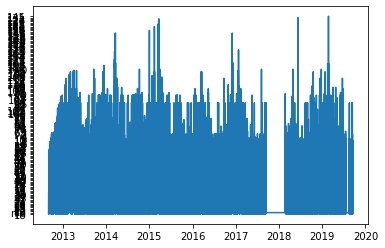

In [146]:
# quick diagnostics
#import matplotlib.pyplot as plt

from datetime import datetime

x = df.dateTime
y = df.countOpera
plt.plot(x,y)

In [150]:
import json
with open('../airQuality-auber.json') as json_data:
    jsonData = json.load(json_data)